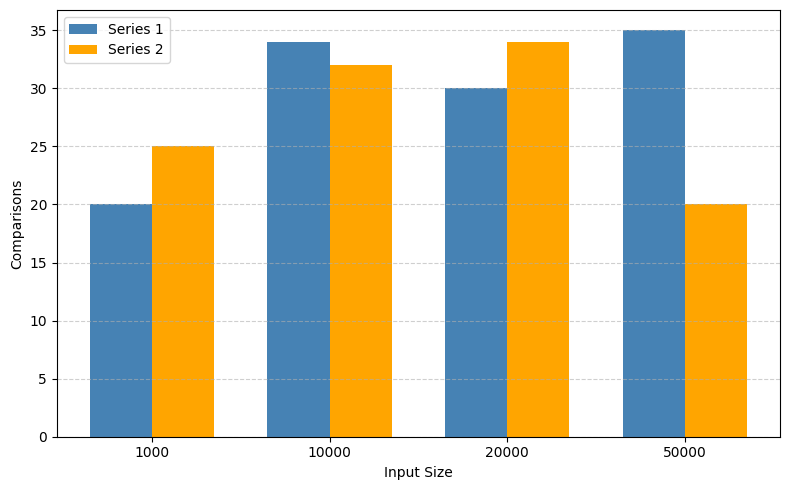

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Categories
categories = ['1000', '10000', '20000', '50000']

# Multiple values per category (e.g., two series)
series1 = [20, 34, 30, 35]
series2 = [25, 32, 34, 20]

# Bar width and positions
x = np.arange(len(categories))
width = 0.35  # Width of each bar

# Create grouped bar plot
plt.figure(figsize=(8, 5))
plt.bar(x - width/2, series1, width, label='Series 1', color='steelblue')
plt.bar(x + width/2, series2, width, label='Series 2', color='orange')

# Add labels and title
plt.xlabel('Input Size')
plt.ylabel('Comparisons')
#plt.title('Grouped Bar Plot Example')
plt.xticks(x, categories)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show plot
plt.tight_layout()
plt.show()

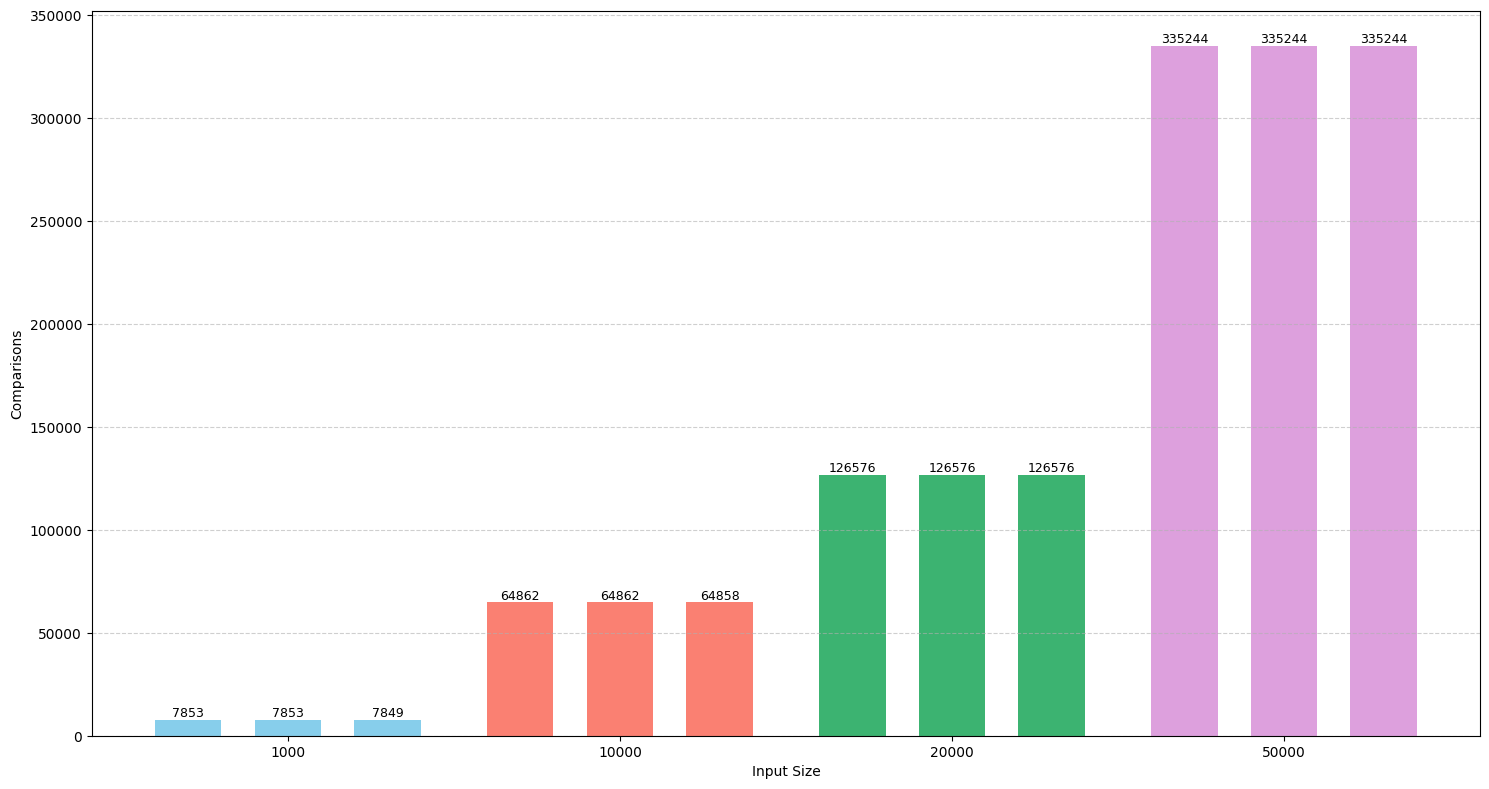

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Categories and data
categories = ['1000', '10000', '20000', '50000']
series1 = [7853, 64862, 126576,  335244]
series2 = [7853, 64862, 126576,  335244]
series3 = [7849, 64858, 126576,  335244]

# Bar settings
width = 0.2
gap = 0.1
x = np.arange(len(categories))

# Define a unique color for each category group
category_colors = ['skyblue', 'salmon', 'mediumseagreen', 'plum']

plt.figure(figsize=(15, 8))

# Plot bars for each category group
for i in range(len(categories)):
    xpos = x[i]
    color = category_colors[i]
    
    # Plot each series bar at its offset
    bars = [
        plt.bar(xpos - width - gap, series1[i], width, color=color),
        plt.bar(xpos, series2[i], width, color=color),
        plt.bar(xpos + width + gap, series3[i], width, color=color)
    ]
    
    # Add value labels on top of each bar
    for bar in bars:
        for rect in bar:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width()/2, height + 1,
                     f'{height}', ha='center', va='bottom', fontsize=9)

# Add labels and formatting
plt.xlabel('Input Size')
plt.ylabel('Comparisons')
plt.xticks(x, categories)
plt.grid(axis='y', linestyle='--', alpha=0.6)
#plt.title('Grouped Bar Plot with Category Colors and Value Labels')

# Legend (optional: you can customize this further)
#plt.legend(['Series 1', 'Series 2', 'Series 3'], loc='upper left')

plt.tight_layout()
plt.show()

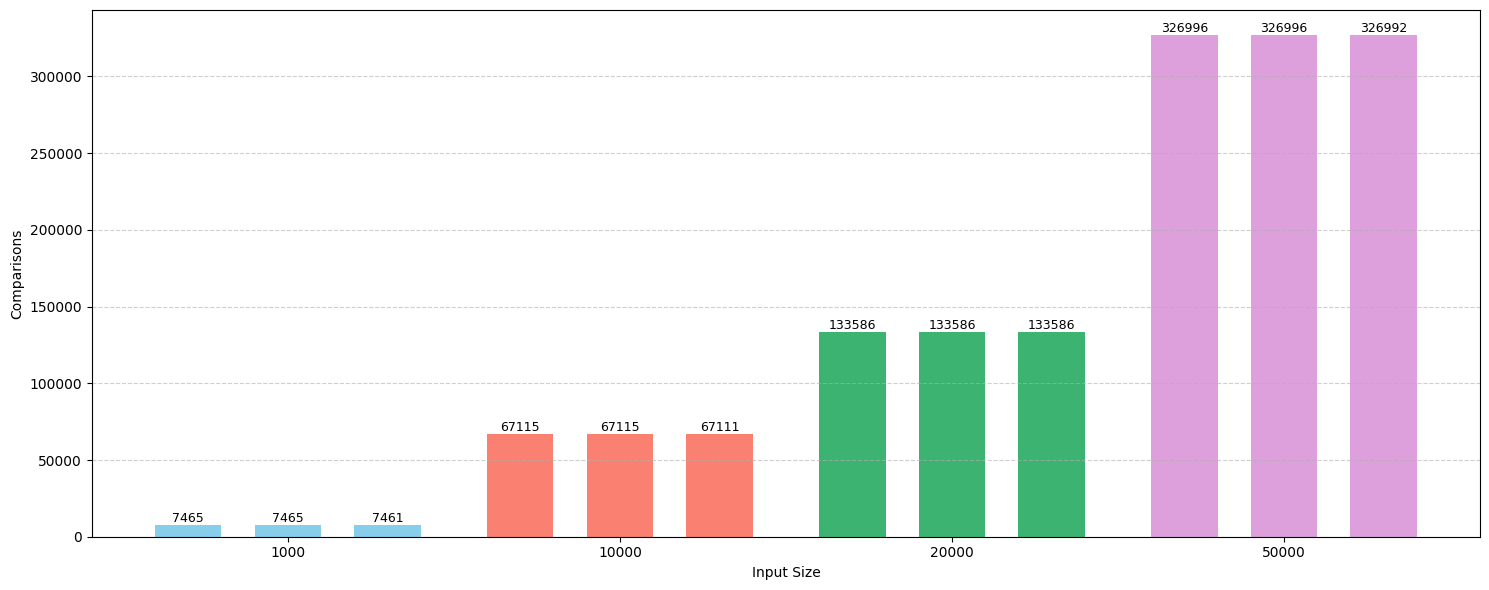

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Categories and data
categories = ['1000', '10000', '20000', '50000']
series1 = [7465, 67115, 133586,  326996]
series2 = [7465, 67115, 133586,  326996]
series3 = [7461, 67111, 133586,  326992]

# Bar settings
width = 0.2
gap = 0.1
x = np.arange(len(categories))

# Define a unique color for each category group
category_colors = ['skyblue', 'salmon', 'mediumseagreen', 'plum']

plt.figure(figsize=(15, 6))

# Plot bars for each category group
for i in range(len(categories)):
    xpos = x[i]
    color = category_colors[i]
    
    # Plot each series bar at its offset
    bars = [
        plt.bar(xpos - width - gap, series1[i], width, color=color),
        plt.bar(xpos, series2[i], width, color=color),
        plt.bar(xpos + width + gap, series3[i], width, color=color)
    ]
    
    # Add value labels on top of each bar
    for bar in bars:
        for rect in bar:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width()/2, height + 1,
                     f'{height}', ha='center', va='bottom', fontsize=9)

# Add labels and formatting
plt.xlabel('Input Size')
plt.ylabel('Comparisons')
plt.xticks(x, categories)
plt.grid(axis='y', linestyle='--', alpha=0.6)
#plt.title('Grouped Bar Plot with Category Colors and Value Labels')

# Legend (optional: you can customize this further)
#plt.legend(['Series 1', 'Series 2', 'Series 3'], loc='upper left')

plt.tight_layout()
plt.show()

Input Size |          k |     Comparisons
----------------------------------------
      1000 |          1 |            2934
      1000 |        500 |            3104
      1000 |       1000 |            3077
     10000 |          1 |           32201
     10000 |       5000 |           31623
     10000 |      10000 |           31821
     20000 |          1 |           64639
     20000 |      10000 |           65254
     20000 |      20000 |           65072
     50000 |          1 |          168231
     50000 |      25000 |          168526
     50000 |      50000 |          169671


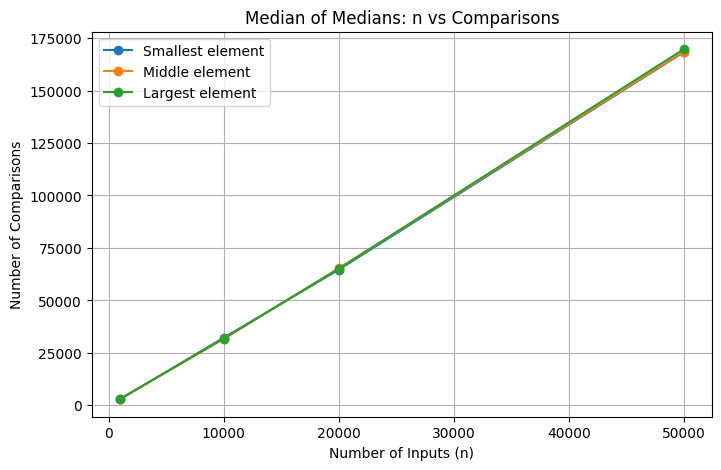

In [4]:
import random
import matplotlib.pyplot as plt

GROUP_SIZE = 5
comparison_count = 0  # Global counter

# -----------------------------
# Insertion sort (for groups of ≤ 5)
# -----------------------------
def insertion_sort(arr, left, right):
    global comparison_count
    for i in range(left + 1, right + 1):
        key = arr[i]
        j = i - 1
        while j >= left and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    # Comparisons here are NOT counted (as per your request)

# -----------------------------
# Partition around pivot
# -----------------------------
def partition(arr, left, right, pivot):
    global comparison_count
    while True:
        while arr[left] < pivot:
            comparison_count += 1
            left += 1
        comparison_count += 1  # For failed comparison
        while arr[right] > pivot:
            comparison_count += 1
            right -= 1
        comparison_count += 1  # For failed comparison
        if left >= right:
            return right
        arr[left], arr[right] = arr[right], arr[left]
        left += 1
        right -= 1

# -----------------------------
# Median of Medians select
# -----------------------------
def select(arr, left, right, k):
    global comparison_count

    if right - left + 1 <= GROUP_SIZE:
        insertion_sort(arr, left, right)
        return arr[left + k - 1]

    # Find medians of groups of 5
    medians = []
    i = left
    while i <= right:
        sub_right = min(i + GROUP_SIZE - 1, right)
        insertion_sort(arr, i, sub_right)
        median_index = (i + sub_right) // 2
        medians.append(arr[median_index])
        i += GROUP_SIZE

    # Find median of medians
    if len(medians) == 1:
        pivot = medians[0]
    else:
        pivot = select(medians, 0, len(medians) - 1, (len(medians) + 1) // 2)

    # Partition
    pivot_index = partition(arr, left, right, pivot)

    length = pivot_index - left + 1
    if k == length:
        return arr[pivot_index]
    elif k < length:
        return select(arr, left, pivot_index, k)
    else:
        return select(arr, pivot_index + 1, right, k - length)

# -----------------------------
# Experiment runner
# -----------------------------
def run_experiment():
    global comparison_count
    sizes = [1000, 10000, 20000, 50000]
    results = []

    for n in sizes:
        arr = [random.randint(1, n*10) for _ in range(n)]
        ks = [1, n//2, n]  # smallest, middle, largest element
        for k in ks:
            arr_copy = arr.copy()
            comparison_count = 0
            select(arr_copy, 0, len(arr_copy) - 1, k)
            results.append((n, k, comparison_count))

    return results

# -----------------------------
# Main execution
# -----------------------------
results = run_experiment()

# Print table
print(f"{'Input Size':>10} | {'k':>10} | {'Comparisons':>15}")
print("-" * 40)
for n, k, comps in results:
    print(f"{n:>10} | {k:>10} | {comps:>15}")

# Plot graph (input size vs comparisons)
plt.figure(figsize=(8,5))
for k in [1, 'middle', 'max']:
    pass  # We'll use grouping from results below

# Separate by k positions for plotting
ks_map = {1: "Smallest", "middle": "Middle", "largest": "Largest"}
for idx, k in enumerate([1, "middle", "largest"]):
    x_vals = []
    y_vals = []
    for n, kk, comps in results:
        if (k == "middle" and kk == n//2) or (k == "largest" and kk == n) or (k == 1 and kk == 1):
            x_vals.append(n)
            y_vals.append(comps)
    plt.plot(x_vals, y_vals, marker='o', label=f"{ks_map[k]} element")

plt.xlabel("Number of Inputs (n)")
plt.ylabel("Number of Comparisons")
plt.title("Median of Medians: n vs Comparisons")
plt.legend()
plt.grid(True)
plt.show()

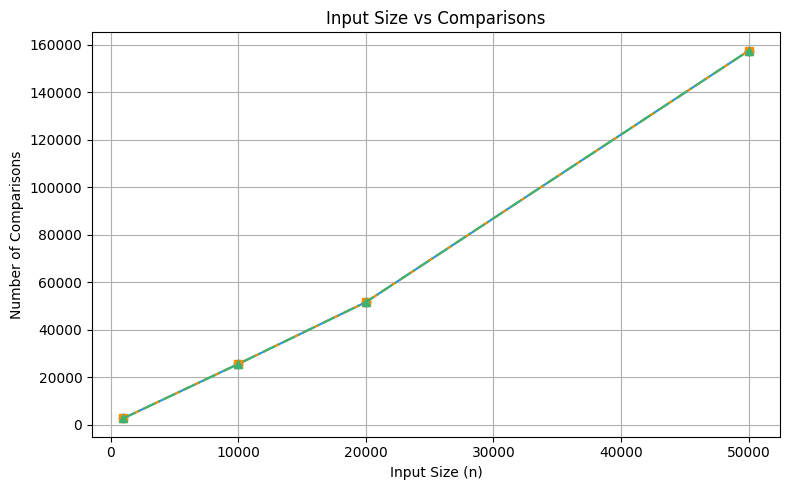

In [12]:
import matplotlib.pyplot as plt

# 1. Define your input sizes
sizes = [1000, 10000, 20000, 50000]

# 2. Enter comparison counts for each of your three runs
#    (these correspond to the three Index‐Value runs in your table)
comps_run1 = [2754, 25609, 51648, 157486]
comps_run2 = [2754, 25609, 51651, 157486]
comps_run3 = [2751, 25609, 51651, 157484]

# 3. (Optional) Keep track of which Index was used in each run
indices_run1 = [5, 6, 7, 6]
indices_run2 = [11, 11, 9, 9]
indices_run3 = [10, 8, 5, 8]

# 4. Create the plot
plt.figure(figsize=(8, 5))

plt.plot(sizes, comps_run1, marker='o', linestyle='-',  color='dodgerblue',  label='Run 1 (idx: {})'.format(indices_run1))
plt.plot(sizes, comps_run2, marker='s', linestyle='--', color='darkorange', label='Run 2 (idx: {})'.format(indices_run2))
plt.plot(sizes, comps_run3, marker='^', linestyle='-.', color='mediumseagreen', label='Run 3 (idx: {})'.format(indices_run3))

# 5. Annotate each point with its comparison count
# for x, y in zip(sizes, comps_run1):
#     plt.text(x, y + max(comps_run1)*0.01, str(y), ha='center', va='bottom', fontsize=9)
# for x, y in zip(sizes, comps_run2):
#     plt.text(x, y + max(comps_run2)*0.01, str(y), ha='center', va='bottom', fontsize=9)
# for x, y in zip(sizes, comps_run3):
#     plt.text(x, y + max(comps_run3)*0.01, str(y), ha='center', va='bottom', fontsize=9)

# 6. Format the axes and add grid/legend
plt.xlabel('Input Size (n)')
plt.ylabel('Number of Comparisons')
plt.title('Input Size vs Comparisons')
plt.grid(True)
#plt.legend()
plt.tight_layout()

# 7. Display
plt.show()